In [1]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
weather = pd.read_csv('../Final_Data/London_weather_hourly_winter_2013-14_(00).csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index(['Unnamed: 0', 'Datetime', 'Dew_Point_F', 'Temperature_F',
       'Wind_Speed_MPH'],
      dtype='object')

In [3]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2899 entries, 2013-12-01 00:00:00 to 2014-03-31 22:00:00
Data columns (total 5 columns):
Unnamed: 0        2899 non-null object
Datetime          2899 non-null object
Dew_Point_F       2899 non-null float64
Temperature_F     2899 non-null float64
Wind_Speed_MPH    2899 non-null object
dtypes: float64(2), object(3)
memory usage: 135.9+ KB


In [5]:
energy = pd.read_csv('../Final_Data/energy_final_2013_14.csv', skiprows=2, parse_dates=[0], infer_datetime_format=True)
energy.iloc[:,1:].convert_objects(convert_numeric=True)
energy.columns

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index(['DateTime', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [6]:
energy.index = pd.DatetimeIndex(energy.DateTime)

In [7]:
energy.columns = [['Datetime', 'Low_Income', 'High_Income', 'Middle_Income']]

In [8]:
energy.head()

,Datetime,Low_Income,High_Income,Middle_Income
2013-12-01 01:00:00,2013-12-01 01:00:00,0.386444,0.479599,0.424813
2013-12-01 02:00:00,2013-12-01 02:00:00,0.301773,0.381671,0.314566
2013-12-01 03:00:00,2013-12-01 03:00:00,0.253057,0.335496,0.263379
2013-12-01 04:00:00,2013-12-01 04:00:00,0.229611,0.312186,0.252521
2013-12-01 05:00:00,2013-12-01 05:00:00,0.217060,0.305041,0.253142


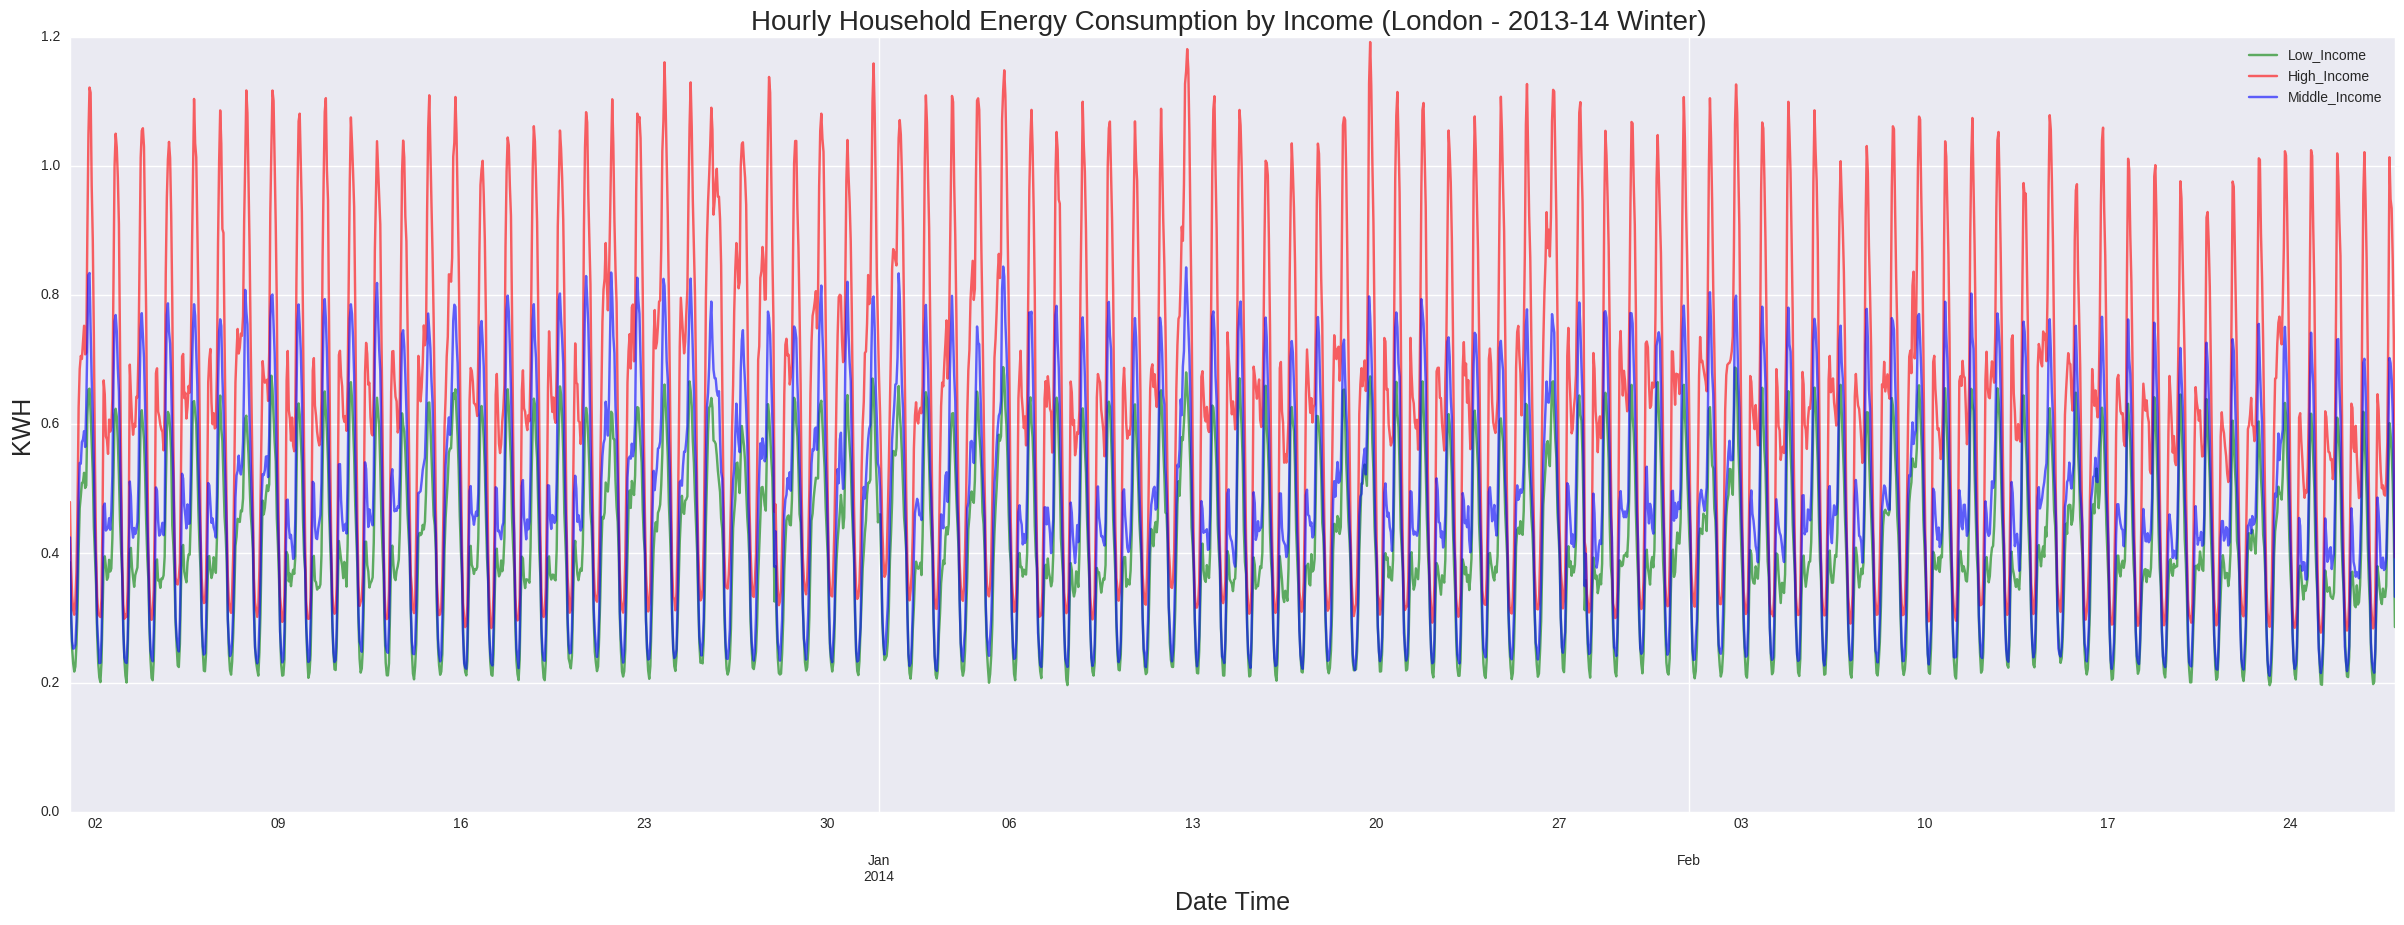

In [9]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy.plot(x='Datetime', y='Low_Income', color='Green',alpha=.6, ax=ax)
energy.plot(x='Datetime', y='High_Income', color='Red', alpha=.6, ax=ax)
energy.plot(x='Datetime', y='Middle_Income', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [10]:
#weather = weather.convert_objects(convert_numeric=True)
weather1 = weather[:2136]
weather1.drop('Unnamed: 0', 1, inplace=True)
weather1.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Datetime,Dew_Point_F,Temperature_F,Wind_Speed_MPH
2013-12-01 00:00:00,2013-12-01 00:00:00,32.0,33.8,4.6
2013-12-01 01:00:00,2013-12-01 01:00:00,33.8,33.8,4.6
2013-12-01 02:00:00,2013-12-01 02:00:00,33.8,35.6,4.6
2013-12-01 03:00:00,2013-12-01 03:00:00,35.6,35.6,4.6
2013-12-01 04:00:00,2013-12-01 04:00:00,35.6,37.4,8.1


In [11]:
energy.reset_index(inplace=True)
energy.head()

,index,Datetime,Low_Income,High_Income,Middle_Income
0,2013-12-01 01:00:00,2013-12-01 01:00:00,0.386444,0.479599,0.424813
1,2013-12-01 02:00:00,2013-12-01 02:00:00,0.301773,0.381671,0.314566
2,2013-12-01 03:00:00,2013-12-01 03:00:00,0.253057,0.335496,0.263379
3,2013-12-01 04:00:00,2013-12-01 04:00:00,0.229611,0.312186,0.252521
4,2013-12-01 05:00:00,2013-12-01 05:00:00,0.217060,0.305041,0.253142


In [12]:
weather1.reset_index(inplace=True)
weather1.head()

,index,Datetime,Dew_Point_F,Temperature_F,Wind_Speed_MPH
0,2013-12-01 00:00:00,2013-12-01 00:00:00,32.0,33.8,4.6
1,2013-12-01 01:00:00,2013-12-01 01:00:00,33.8,33.8,4.6
2,2013-12-01 02:00:00,2013-12-01 02:00:00,33.8,35.6,4.6
3,2013-12-01 03:00:00,2013-12-01 03:00:00,35.6,35.6,4.6
4,2013-12-01 04:00:00,2013-12-01 04:00:00,35.6,37.4,8.1


In [13]:
final2013_14 = pd.merge(weather1, energy, on='index')

In [15]:
final2013_14.drop(['Datetime_x', 'Datetime_y'], 1, inplace=True)
final2013_14.head()

,index,Dew_Point_F,Temperature_F,Wind_Speed_MPH,Low_Income,High_Income,Middle_Income
0,2013-12-01 01:00:00,33.8,33.8,4.6,0.386444,0.479599,0.424813
1,2013-12-01 02:00:00,33.8,35.6,4.6,0.301773,0.381671,0.314566
2,2013-12-01 03:00:00,35.6,35.6,4.6,0.253057,0.335496,0.263379
3,2013-12-01 04:00:00,35.6,37.4,8.1,0.229611,0.312186,0.252521
4,2013-12-01 05:00:00,37.4,39.2,4.6,0.217060,0.305041,0.253142


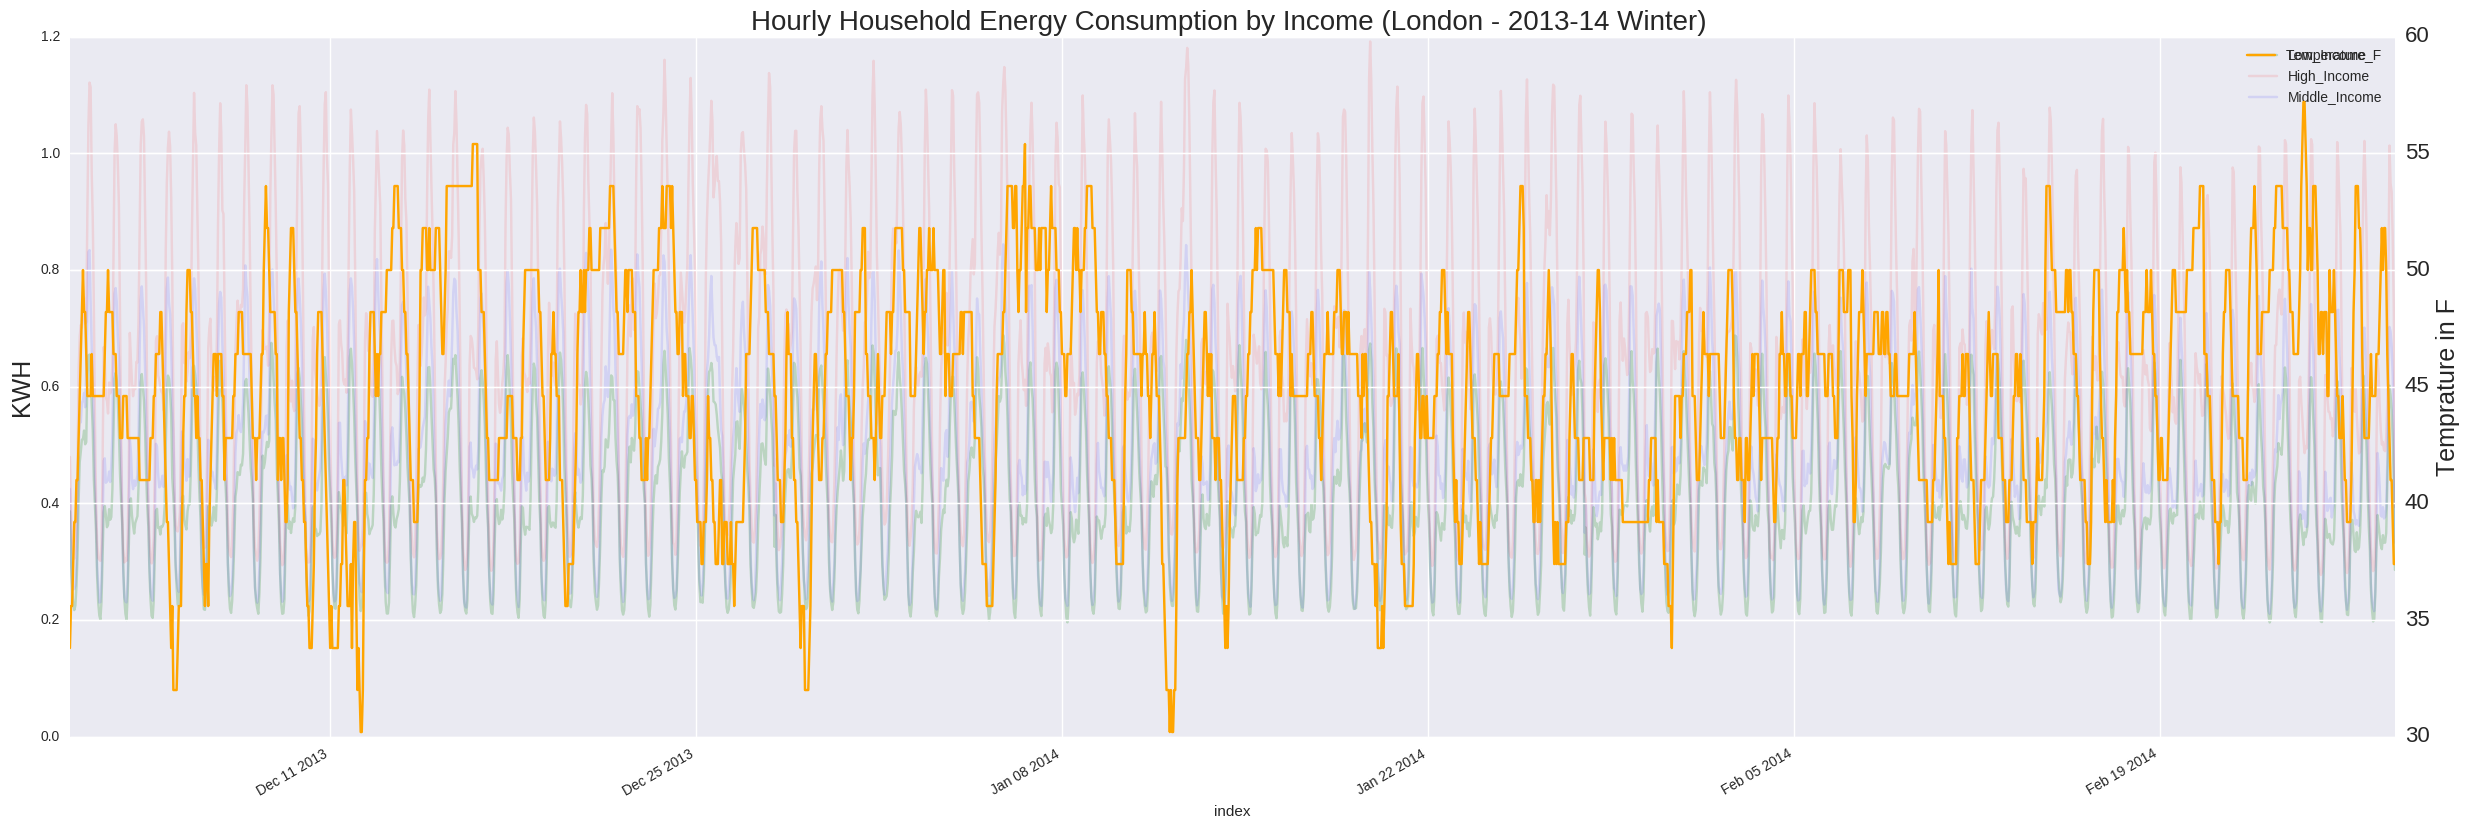

In [20]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2013_14.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
final2013_14.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
final2013_14.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
final2013_14.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [ ]:

import statsmodels.api as sm


In [24]:
regress1 = smf.ols(formula = 'Low_Income ~ Temperature_F', data = final2013_14).fit()
print ('pvalue for temperature vs low income is ', regress1.pvalues[1])
regress1.summary()

pvalue for temperature vs low income is  1.02315130986e-11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Low_Income   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     46.80
Date:                Fri, 02 Dec 2016   Prob (F-statistic):           1.02e-11
Time:                        15:40:45   Log-Likelihood:                 1387.7
No. Observations:                2135   AIC:                            -2771.
Df Residuals:                    2133   BIC:                            -2760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.2362      0.026      9.192      0.000         0.186     0.287
Temperature_F     0.0039      0.001      6.841      0.000         0.003     0.005
==============================================================================
Omnibus:                      221.291   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.730
Skew:                           0.250   Prob(JB):                     1.08e-18
Kurtosis:                       2.175   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_new = energy['Unnamed: 1']
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.Close.values)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()

In [27]:
final2013_14_ = final2013_14.copy()
final2013_14_.drop('Wind_Speed_MPH', 1, inplace=True)

In [28]:
fourier = []
for column in final2013_14_:
    ft = np.abs(np.fft.rfft(final2013_14_[column]))
    fourier.append({'station_id': column, 'yr_periodicity_score': ft[4]})
    
df_ft = pd.DataFrame(fourier).sort_values(by='yr_periodicity_score', ascending=False)
(df_ft)

,station_id,yr_periodicity_score
0,index,6.531527e+17
1,Dew_Point_F,1.822171e+03
2,Temperature_F,1.491289e+03
4,High_Income,1.359463e+01
5,Middle_Income,8.026306e+00
3,Low_Income,6.454894e+00


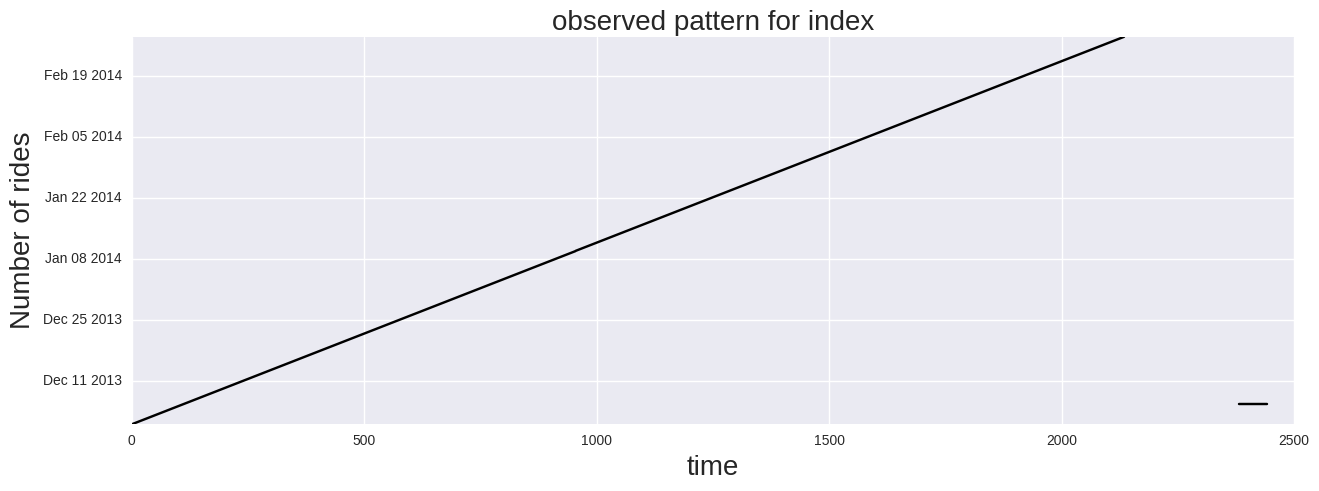

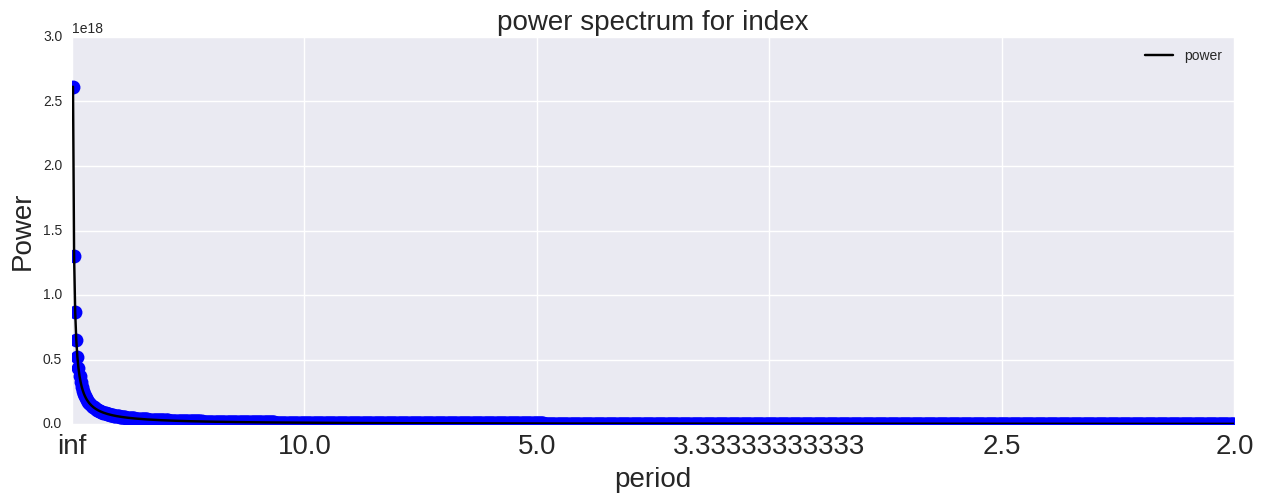

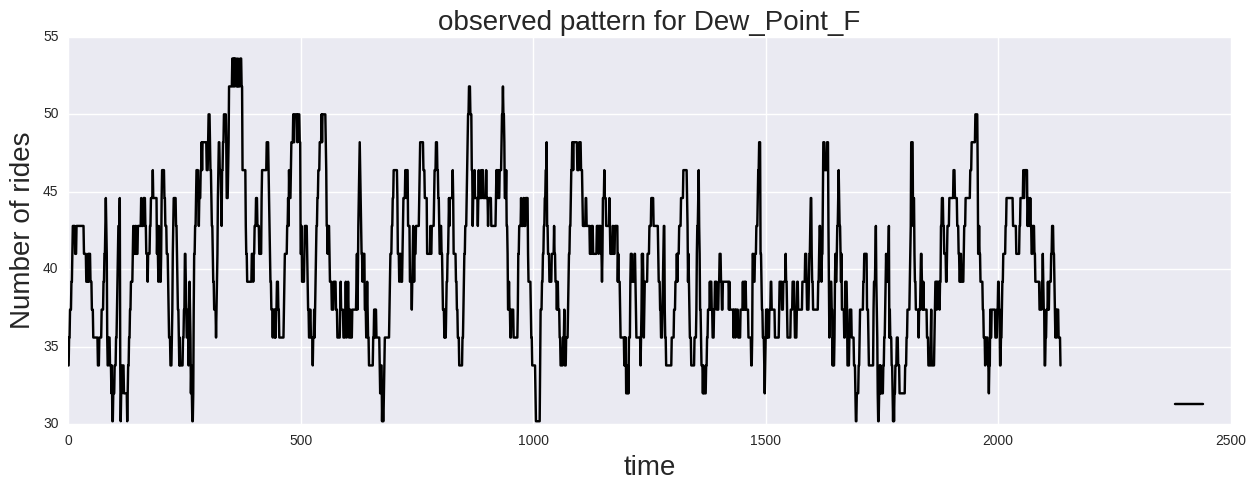

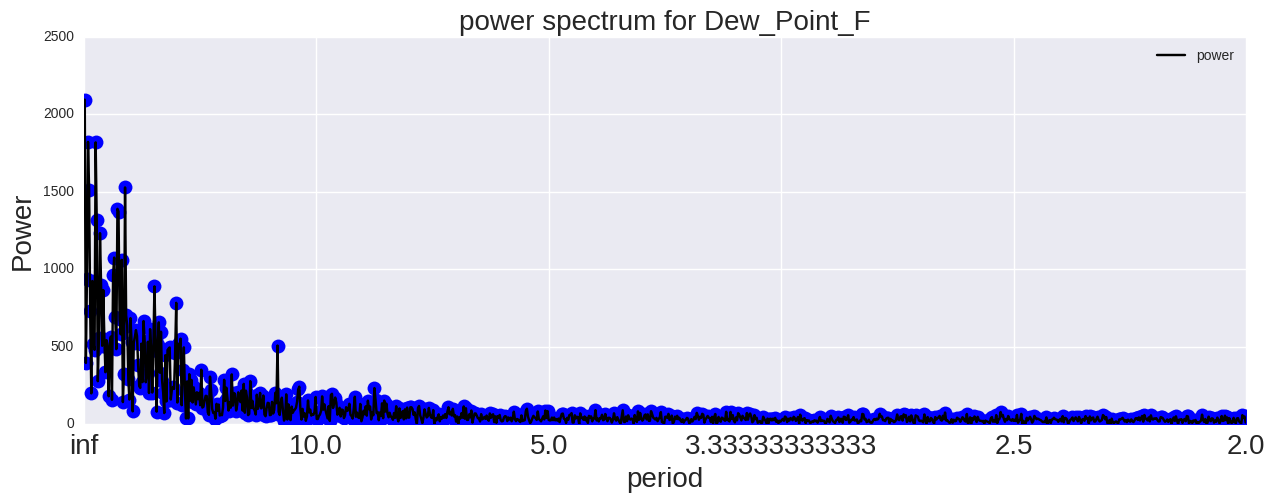

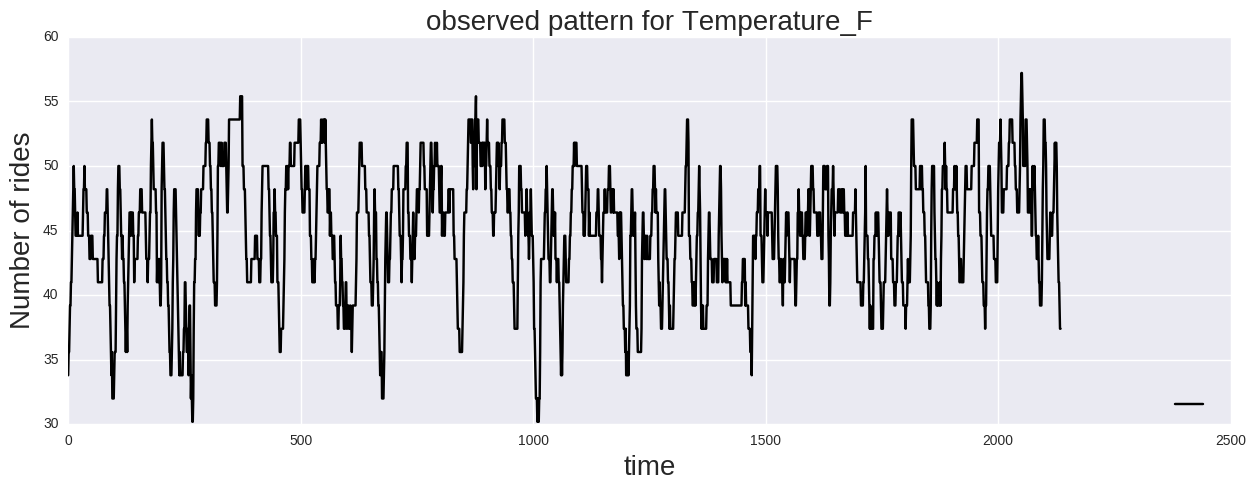

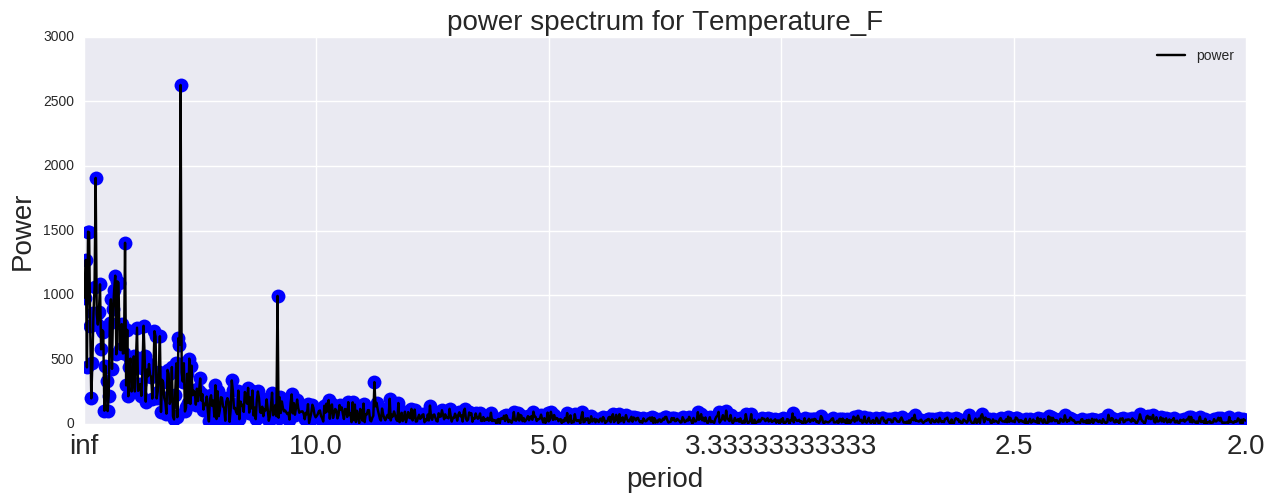

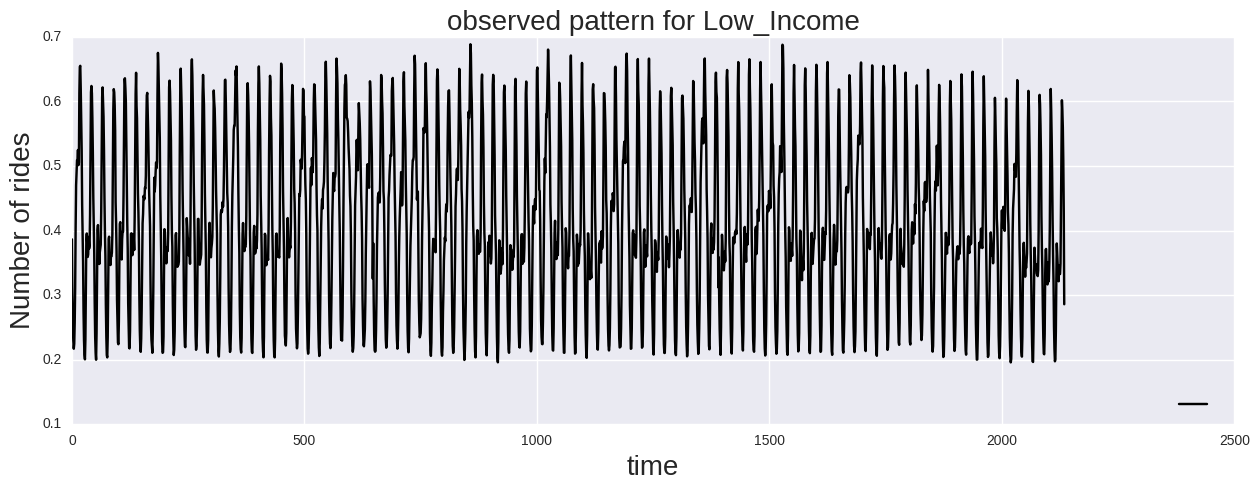

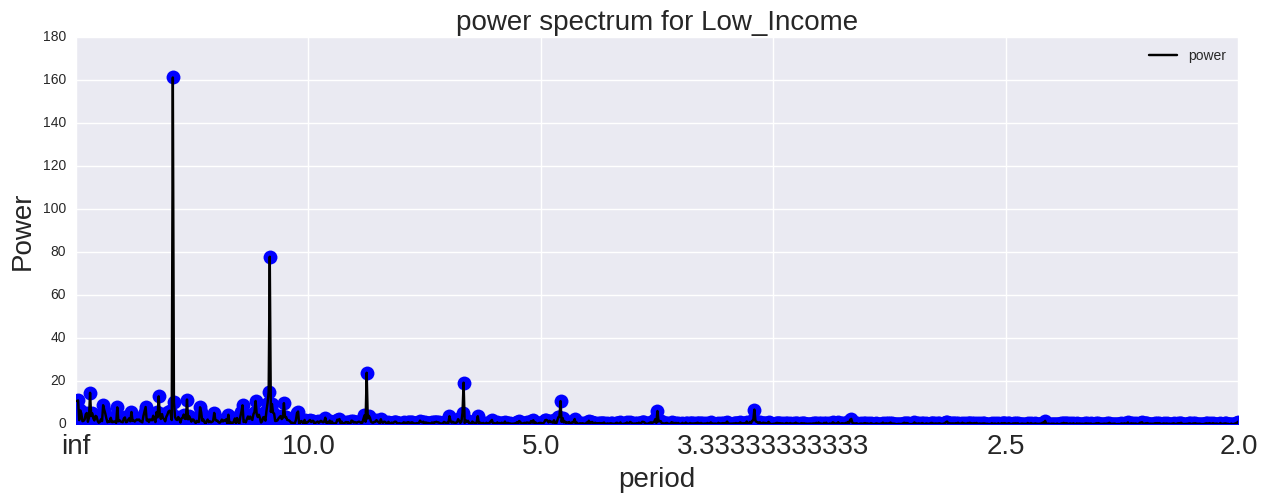

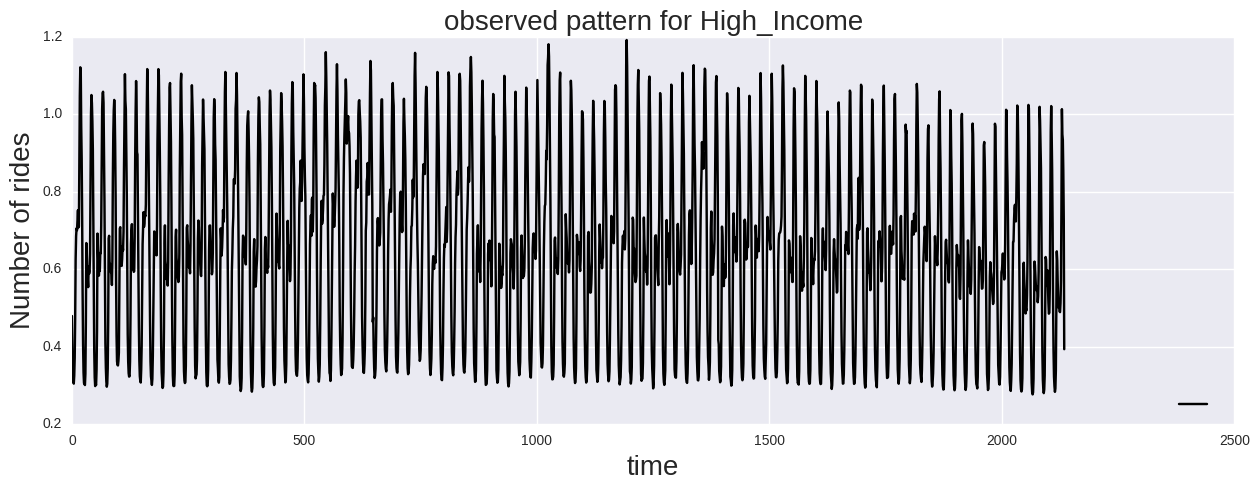

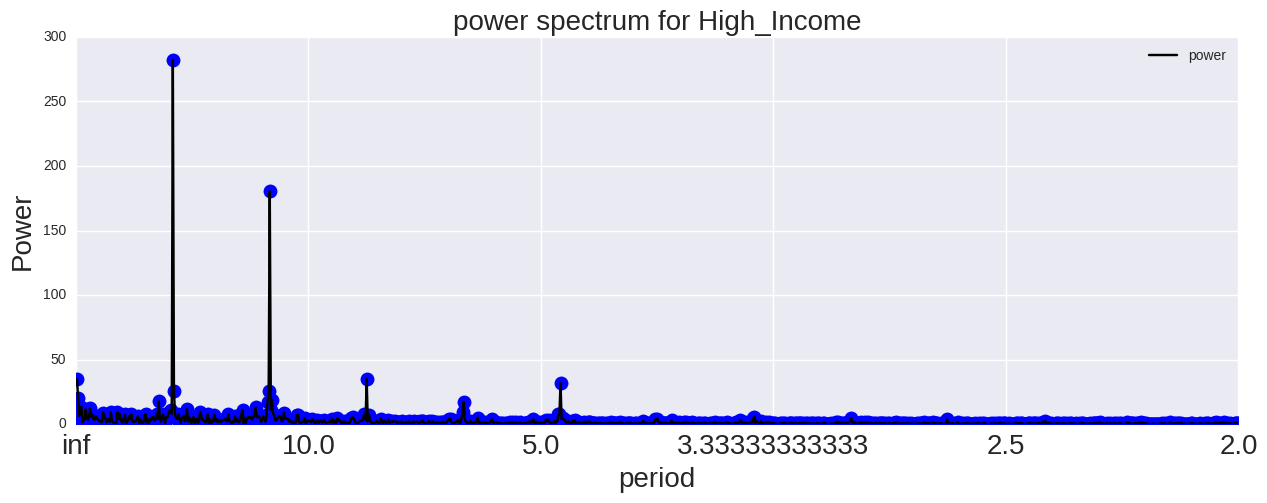

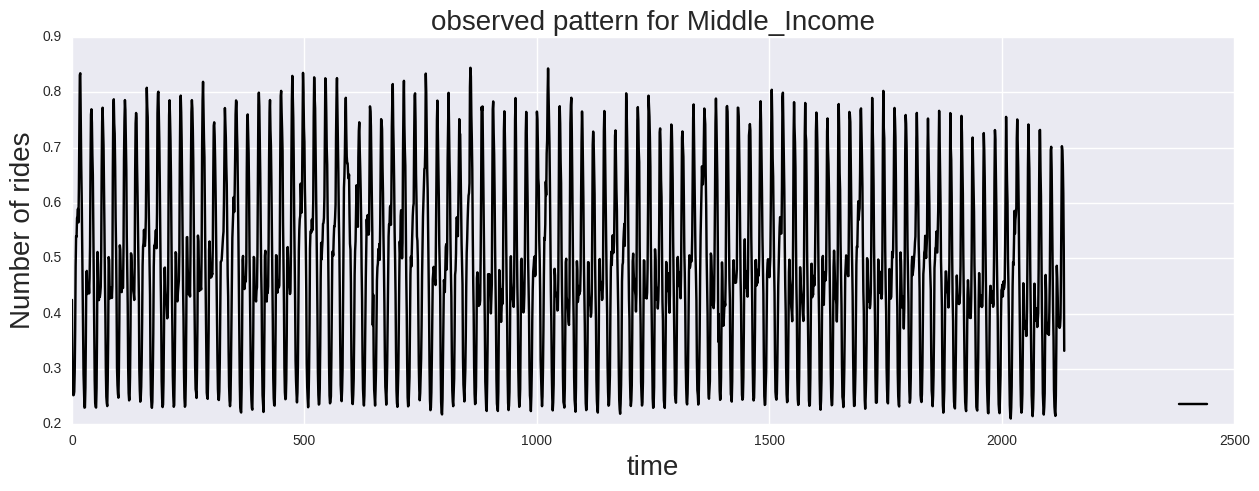

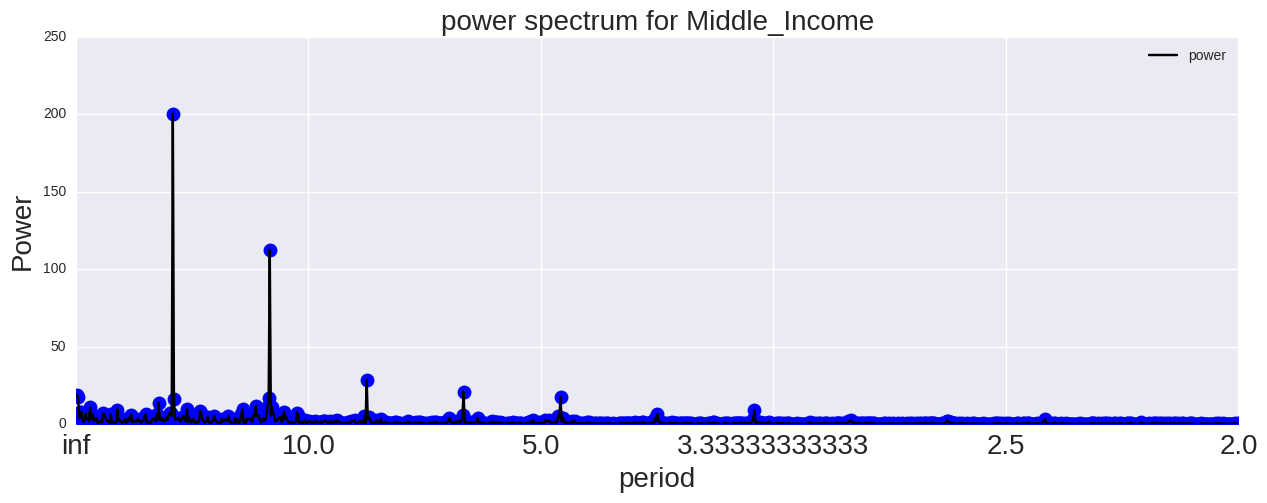

In [32]:
for column in final2013_14_:
    ft = np.abs(np.fft.rfft(final2013_14_[column]))
    N = len(final2013_14_)
    # ploting rides
    fx = pl.figure(figsize=(15,5)).add_subplot(111)
    fx.plot(final2013_14_[column], color='black', label=' ')
    fx.set_title('observed pattern for %s'%(column), fontsize = 20)
    fx.set_ylabel("Number of rides", fontsize=20)
    fx.set_xlabel("time", fontsize=20)
    fx.legend(loc=4)
    # ploting power spectrum from furnier transformation
    ax=pl.figure(figsize=(15,5)).add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (ft[1:]), 'bo', ms=10)
    #ax.plot(np.fft.rfftfreq(N, 1.0)[4], (ft[4]), 'ro', ms=20, label='52nd week')
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (ft[1:]), color ='black', label = 'power')
    ax.get_xticks(minor=True)
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
    ax.legend(loc=1)
    pl.xlabel("period", fontsize=20)
    pl.ylabel("Power", fontsize=20)
    pl.title("power spectrum for %s"%(column), fontsize=20)